In [2]:
#loading libararies and reading the data

import numpy as np
import pandas as pd
import re

mapping_df = pd.read_csv("mapping.csv")
rounds2_df = pd.read_csv("rounds2.csv", encoding = 'palmos')
companies_df = pd.read_csv("companies.txt",delimiter="\t", encoding = 'palmos')

In [3]:
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
rounds2_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
rounds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [7]:
# Converting permalink (unique ID) to lower case in companies df

companies_df["permalink"] = companies_df["permalink"].apply(lambda x: x.lower())
companies_df.shape

(66368, 10)

In [8]:
# Converting permalink (unique ID) to lower case in companies df

rounds2_df["company_permalink"] = rounds2_df["company_permalink"].apply(lambda x: x.lower())
rounds2_df.shape

(114949, 6)

In [9]:
# Finding unique companies in round2 dataframe
# Alternatively : len(rounds2_df.company_permalink.unique()) 
unique_companies_rounds = set(rounds2_df.company_permalink)
print(len(unique_companies_rounds))

66368


In [10]:
# Finding unique companies in companies dataframe
# Alternatively : len(companies_df.permalink.unique()) 
unique_companies_in_companies_df = set(companies_df.permalink)
print(len(unique_companies_in_companies_df))

66368


In [11]:
# companies in the rounds2 file which are not present in companies file
set3 = unique_companies_rounds.difference(unique_companies_in_companies_df)
print(len(set3))

0


In [12]:
# Renaming the column company_permanlink of rounds to permalink
rounds2_df.columns = ['permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd']

In [13]:
# Merge the two data frames
master_frame = pd.merge(companies_df, rounds2_df, how="inner", on="permalink")
master_frame.shape

(114949, 15)

## Cleaning Data

In [14]:
# Let's have a look at the merged dataframe
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [15]:
master_frame.shape

(114949, 15)

In [16]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [17]:
#summing up missing values
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [18]:
# rows having all missing values
master_frame.isnull().all(axis=1).sum()

0

Hence no rows have all missing values

In [19]:
# Finding percentage of missing values (column wise)
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [20]:
# Dropping the funding_round_code column as it is not significant and has high percentage of missing value 
master_frame = master_frame.drop('funding_round_code', axis = 1)
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [21]:
# Remaining columns

master_frame.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd'],
      dtype='object')

In [22]:
# Dropping homepage_url as not significant for our analysis

master_frame = master_frame.drop('homepage_url', axis = 1)
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [23]:
master_frame.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at', 'funding_round_permalink',
       'funding_round_type', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [24]:
# Dropping founded_at as not significant for our analysis

master_frame = master_frame.drop('founded_at', axis = 1)
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [25]:
# Understanding the status column

print(set(list(master_frame.status)))

{'ipo', 'acquired', 'closed', 'operating'}


In [26]:
master_frame.shape

(114949, 12)

In [27]:
# Removing companies with status = Closed

master_frame = master_frame.loc[ master_frame["status"]!="closed", : ]
master_frame.shape

(106224, 12)

#### Would do the further data cleaning based on the requirement / type of analysis.

# Grouping by funding round - Investment Type analysis

In [28]:
investment_types = ["venture","angel","seed","private_equity"]

In [29]:
master_frame = master_frame.loc[master_frame['funding_round_type'].isin(investment_types), :]

In [30]:
# Now understanding the type of data we have
# Look at the summary again
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
category_list               1.87
status                      0.00
country_code                6.60
state_code                  8.69
region                      7.91
city                        7.90
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          14.21
dtype: float64

#### Imputing values of raised_amount_usd 

Let's first have a look at the data for various founding_round_type :

In [31]:
master_frame.shape

(86844, 12)

In [32]:
master_frame.loc[master_frame['funding_round_type']=="venture",:].raised_amount_usd.describe()

count    4.664100e+04
mean     1.189560e+07
std      8.935104e+07
min      0.000000e+00
25%      1.634000e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

The 3rd quartile is 7.5 times the 1st quartile for venture type !

In [33]:
master_frame.loc[master_frame['funding_round_type']=="angel",:].raised_amount_usd.describe()

count    4.305000e+03
mean     9.799154e+05
std      7.824931e+06
min      0.000000e+00
25%      1.528420e+05
50%      4.000000e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

The 3rd quartile is 6.67 times the 1st quartile for angel type !

In [34]:
master_frame.loc[master_frame['funding_round_type']=="seed",:].raised_amount_usd.describe()

count    2.174900e+04
mean     7.385902e+05
std      2.280015e+06
min      0.000000e+00
25%      6.000000e+04
50%      3.000000e+05
75%      1.000000e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

The 3rd quartile is 17 times the 1st quartile for seed type !

In [35]:
master_frame.loc[master_frame['funding_round_type']=="private_equity",:].raised_amount_usd.describe()

count    1.806000e+03
mean     7.557581e+07
std      2.040155e+08
min      0.000000e+00
25%      5.270000e+06
50%      2.000000e+07
75%      7.594064e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

The 3rd quartile is 15 times the 1st quartile for private_equity type !

In [36]:
master_frame.raised_amount_usd.describe()

count    7.450100e+04
mean     9.551481e+06
std      7.840652e+07
min      0.000000e+00
25%      4.350000e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

The difference in Q1 and Q3 for the whole data is almost 20 times!

Since the variation in data is so high, I shall be using "Median" as the Representative statistic for each funding_type to compare. 

As far as missing values are concerned, imputting all types of funding_round_type by the same value would lead to introduction of very high bias in the data.

Then the other alternative left would be to impute rows by checking their funding_type and filling the missing value with the median of the corresponding funding_type. 

However such an exercise would be futile as I will be comparing the funding_types on the basis of median value, and filling in missing values with the median value of correponding funding_type is not going to change the median of the funding_type. 

Thus proceeding with comparison of funding_types using the median.

In [37]:
# plot1_df to be used in - Check point 6 : graph 1

plot1_df = master_frame

In [38]:
master_frame_by_funding_type = master_frame.groupby("funding_round_type")

In [39]:
master_funding_df = pd.DataFrame(master_frame_by_funding_type["raised_amount_usd"].median())
master_funding_df

,raised_amount_usd
funding_round_type,
angel,400000.0
private_equity,20000000.0
seed,300000.0
venture,5000000.0


In [40]:
favourable_investment_type = master_funding_df.loc[(master_funding_df.raised_amount_usd >= 5000000) & (master_funding_df.raised_amount_usd <= 15000000) ]
favourable_investment_type

,raised_amount_usd
funding_round_type,
venture,5000000.0


Hence we can conclude that Venture type funding meets our requirements.

Thus keeping only those records which have "venture" as the 'funding_round_type'

In [41]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
category_list               1.87
status                      0.00
country_code                6.60
state_code                  8.69
region                      7.91
city                        7.90
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          14.21
dtype: float64

In [42]:
master_frame = master_frame.loc[master_frame['funding_round_type']=="venture", :]
master_frame["funding_round_type"].describe()

count       51463
unique          1
top       venture
freq        51463
Name: funding_round_type, dtype: object

#### Imputting the missing values for raised_amount_usd by median value for venture


In [43]:
# Calculating venture median
venture_median = master_frame["raised_amount_usd"].median()
venture_median

5000000.0

In [44]:
# Imputting the missing values with the median of venture funding_type
master_frame.loc[np.isnan(master_frame["raised_amount_usd"]), ["raised_amount_usd"]] = 5000000.0
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

/Users/harshitmehta/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


permalink                  0.00
name                       0.00
category_list              1.38
status                     0.00
country_code               4.41
state_code                 6.08
region                     5.62
city                       5.62
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

# Country wise Analysis

Steps :
1. Clean the raised_amount_usd data
2. Impute country_code
3. Proceed with grouping by country_code

Since country wise analysis would require sum of "raised_amount_usd" per country, will be filtering out the outliers in the data (specifically the raised_amount_usd).

### Outlier Removal
Outlier Criteria : Data point that falls between 1st percentile and 99th percentile

In [45]:
master_frame["raised_amount_usd"].describe()

count    5.146300e+04
mean     1.124950e+07
std      8.508572e+07
min      0.000000e+00
25%      2.000000e+06
50%      5.000000e+06
75%      1.070000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

The raised_amount_usd is ranging from 0 to 17 billion!

In [46]:
# Calculating the percentiles
first_percentile = master_frame["raised_amount_usd"].quantile([.01,.99])[.01]
ninety_nine_percentile = master_frame["raised_amount_usd"].quantile([.01,.99])[.99]

In [47]:
first_percentile

50000.0

In [48]:
ninety_nine_percentile

94462737.99999957

Retaining points in between 1st and 99th percentile

In [49]:
master_frame = master_frame.loc[ (master_frame["raised_amount_usd"] >= first_percentile) & (master_frame["raised_amount_usd"] <= ninety_nine_percentile) , :]

In [50]:
master_frame["raised_amount_usd"].describe()

count    5.044900e+04
mean     8.995876e+06
std      1.182946e+07
min      5.000000e+04
25%      2.000000e+06
50%      5.000000e+06
75%      1.033408e+07
max      9.440000e+07
Name: raised_amount_usd, dtype: float64

Having removed outliers from raised_amount_usd,

Let's probe the data we have :

In [51]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.00
name                       0.00
category_list              1.39
status                     0.00
country_code               4.38
state_code                 6.06
region                     5.60
city                       5.60
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

For Country Analysis we would need to impute values for country code, let's see what other columns contain which can help us impute the value of country code if possible.

In [52]:
master_frame.head()

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,Software,operating,USA,IL,"Springfield, Illinois",Champaign,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.0


In [53]:
# Probably region can help in imputing values for country_code; exploring the region column
print(len(set(master_frame["region"])))

807


In [54]:
master_frame.shape

(50449, 12)

In [55]:
q = master_frame.loc[ ( master_frame['region'].isnull() ) , :]
print(len(q))

2823


In [56]:
q = master_frame.loc[ ( master_frame['region'].isnull() == False) , :]
print(len(q))

47626


In [57]:
q = master_frame.loc[( master_frame.country_code.isnull() ) & ( master_frame['region'].isnull() == False ) , :]
print(len(q))

0


However, there are no rows which have a region but not country code.

Thus we can not use region to impute value of country code. 

Exploring other columns like "city" :

In [58]:
q = master_frame.loc[( master_frame.country_code.isnull() ) & ( master_frame['city'].isnull() == False ) , :]
print(len(q))

0



Thus there are no rows where country code is absent and region/city is present - Ruling out the possibility of imputing values of country on the basis of region/city .



Thus dropping the rows where country code is missing.

In [59]:
# Dropping state_code, region, city as not significant for our analysis
master_frame = master_frame.drop('state_code', axis = 1)
master_frame = master_frame.drop('region', axis = 1)
master_frame = master_frame.drop('city', axis = 1)

round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.00
name                       0.00
category_list              1.39
status                     0.00
country_code               4.38
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [60]:
# Understanding the country_code
# Probing the value that can be imputed
master_frame.pivot_table(values = "raised_amount_usd", index = "country_code", aggfunc = ["count"]).sort_values(('count','raised_amount_usd'), ascending=False).head()


,count
,raised_amount_usd
country_code,
USA,35167
GBR,2109
CHN,1937
CAN,1212
IND,939


In [61]:
master_frame.shape

(50449, 9)

Since around 70% of the dataset has USA as the country_code; we can safely impute the missing values of country_code with USA

In [62]:
# imputting NaNs in country_code with USA
master_frame.loc[pd.isnull(master_frame["country_code"]), ["country_code"]] = "USA"
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.00
name                       0.00
category_list              1.39
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

# Grouping by Country - Country Type analysis

In [63]:
master_frame_by_country_code = master_frame.groupby("country_code")
master_frame_by_country_code["raised_amount_usd"].sum().sort_values(ascending = False).head()

country_code
USA    3.439952e+11
CHN    2.289796e+10
GBR    1.723388e+10
IND    1.009985e+10
CAN    8.791852e+09
Name: raised_amount_usd, dtype: float64

In [64]:
master_frame_by_country_code_df = pd.DataFrame(master_frame_by_country_code["raised_amount_usd"].sum().sort_values(ascending = False))
master_frame_by_country_code_df.head()

,raised_amount_usd
country_code,
USA,3.439952e+11
CHN,2.289796e+10
GBR,1.723388e+10
IND,1.009985e+10
CAN,8.791852e+09


In [65]:
# Selecting the top 9 countries based on 'raised_amount_usd'
master_frame_by_country_code_df[0:9]

,raised_amount_usd
country_code,
USA,3.439952e+11
CHN,2.289796e+10
GBR,1.723388e+10
IND,1.009985e+10
CAN,8.791852e+09
ISR,6.892978e+09
DEU,6.097825e+09
FRA,5.907842e+09
CHE,2.775583e+09


China (CHN), France (FRA), Germany (DEU), Switzerland (CHE) do NOT have english as its official language.

In [66]:
# Creating list of english speaking countries
english_speaking = pd.DataFrame(["USA","GBR","IND","CAN","ISR","SGP","IRL","AUS","HKG"], columns = ["country_code"])

In [67]:
print(english_speaking)

  country_code
0          USA
1          GBR
2          IND
3          CAN
4          ISR
5          SGP
6          IRL
7          AUS
8          HKG


In [68]:
# Filtering out non-english speaking countries from top 9 countries
master_frame_country_english = pd.merge(master_frame_by_country_code_df[0:9], english_speaking, how="inner", on="country_code")
master_frame_country_english

,country_code,raised_amount_usd
0,USA,3.439952e+11
1,GBR,1.723388e+10
2,IND,1.009985e+10
3,CAN,8.791852e+09
4,ISR,6.892978e+09


In [69]:
# Selecting the top 3 english speaking countries
master_frame_country_english[0:3]

,country_code,raised_amount_usd
0,USA,3.439952e+11
1,GBR,1.723388e+10
2,IND,1.009985e+10


# Sector Analysis 1

Steps :
1. Exploring the mapping file
2. Cleaning data of mapping file
3. Preparing the data master_frame - adding primary_sector
4. Resolving conflicts in data in mapping and master_frame
5. Creating a main_sector : primary_sector dictionary from mapping file
6. Creating a new data frame containing primary_sector and main_sector 
7. Merging the new dataframe with master_frame - to add main_sector to master_frame 

In [70]:
# Understanding the mapping file.
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [71]:
mapping_df.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [72]:
mapping_df.shape

(688, 10)

In [73]:
round(100*(mapping_df.isnull().sum()/len(mapping_df.index)),2)

category_list                              0.15
Automotive & Sports                        0.00
Blanks                                     0.00
Cleantech / Semiconductors                 0.00
Entertainment                              0.00
Health                                     0.00
Manufacturing                              0.00
News, Search and Messaging                 0.00
Others                                     0.00
Social, Finance, Analytics, Advertising    0.00
dtype: float64

#### Cleaning data of mapping file

In [74]:
# removing NaNs in category_list
mapping_df = mapping_df[~mapping_df.category_list.isnull() ]
round(100*(mapping_df.isnull().sum()/len(mapping_df.index)),2)

category_list                              0.0
Automotive & Sports                        0.0
Blanks                                     0.0
Cleantech / Semiconductors                 0.0
Entertainment                              0.0
Health                                     0.0
Manufacturing                              0.0
News, Search and Messaging                 0.0
Others                                     0.0
Social, Finance, Analytics, Advertising    0.0
dtype: float64

In [75]:
mapping_df.shape

(687, 10)

Hence 1 row containing NaN as category_list has been removed.

In [76]:
# Converting all categories to lower case for consistency
mapping_df["category_list"] = mapping_df["category_list"].apply(lambda x: x.lower())
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


#### Cleaning and manipulating master_frame :

Steps :

1. Impute category_list

2. Adding primary_sector to master_frame

3. manipulating data in primary_sector column of master_frame

In [77]:
# Understanding the category_list
# Probing the value that can be imputed
master_frame.pivot_table(values = "raised_amount_usd", index = "category_list", aggfunc = ["count"]).sort_values(('count','raised_amount_usd'), ascending=False).head()


,count
,raised_amount_usd
category_list,
Biotechnology,5227
Software,3887
Health Care,1317
Clean Technology,1254
Mobile,1167


We can see that Biotechnology has the highest occurences (10% of category_list), which is significantly higher than the frequency of other categories.

Thus we can safely impute the value of missing categories as Biotechnology.

In [78]:
# Out of the total almost 10% of dataset has Biotechnology as the category
master_frame.shape

(50449, 9)

In [79]:
# Imputting the missing values of category_list with "Biotechnology"
master_frame.loc[pd.isnull(master_frame["category_list"]), ["category_list"]] = "Biotechnology"
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [80]:
# Adding the primary sector column to master_frame
master_frame["primary_sector"] = master_frame["category_list"].apply(lambda x:x if (x.find('|')==-1) else x[0:x.find("|")])
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.0,Application Platforms
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,USA,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,Apps
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web
5,/organization/004-technologies,004 Technologies,Software,operating,USA,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.0,Software


In [81]:
# Manipulating data in primary sector, so that it can be compared with mapping file category_list

master_frame["primary_sector"] = master_frame["primary_sector"].apply(lambda x: x.lower())
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.0,application platforms
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,USA,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,apps
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,curated web
5,/organization/004-technologies,004 Technologies,Software,operating,USA,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.0,software


In [82]:
# Comparing the data in 2 dataframes to understand if there are any conflicts

e = set(list(master_frame["primary_sector"])).difference(set(list(mapping_df["category_list"])))
print(sorted(e))

['adaptive equipment', 'alternative medicine', 'analytics', 'big data analytics', 'biotechnology and semiconductor', 'business analytics', 'cannabis', 'career management', 'china internet', 'cloud management', 'contact management', 'digital rights management', 'digital signage', 'document management', 'educational games', 'energy management', 'enterprise hardware', 'event management', 'finance', 'finance technology', 'financial exchanges', 'financial services', 'fleet management', 'governance', 'greentech', 'identity management', 'innovation management', 'intellectual asset management', 'investment management', 'it management', 'journalism', 'knowledge management', 'lead management', 'mobile analytics', 'nanotechnology', 'natural gas uses', 'natural language processing', 'natural resources', 'navigation', 'personal finance', 'personalization', 'predictive analytics', 'professional networking', 'professional services', 'project management', 'promotional', 'property management', 'rapidly

In [83]:
d = set(list(mapping_df["category_list"])).difference(set(list(master_frame["primary_sector"])))
print(sorted(d))

['0notechnology', '0tural language processing', '0tural resources', '0vigation', 'a0lytics', 'alter0tive medicine', 'anything capital intensive', 'aquaculture', 'baby boomers', 'baby safety', 'big data a0lytics', 'biomass power generation', 'boating industry', 'building owners', 'business a0lytics', 'can0bis', 'career ma0gement', 'casual games', 'charities', 'chi0 internet', 'cloud ma0gement', 'cloud-based music', 'contact ma0gement', 'custom retail', 'digital rights ma0gement', 'digital sig0ge', 'direct advertising', 'document ma0gement', 'educatio0l games', 'email newsletters', 'energy ma0gement', 'energy storage', 'event ma0gement', 'farmers market', 'fi0nce', 'fi0nce technology', 'fi0ncial exchanges', 'fi0ncial services', 'field support services', 'film distribution', 'flash sales', 'fleet ma0gement', 'flowers', 'fmcg', 'forums', 'fuel cells', 'funeral industry', 'gay & lesbian', 'gift registries', 'gover0nce', 'green', 'group buying', 'handmade', 'hedge funds', 'home owners', 'hom

It can be seen from above output, that some sectors are missing in the mapping file.

On a closer look, it can be observed that for some sectors in mapping file, 'na' has been replaced by 0.

Hence, going to clean the data in mapping file and then re-check.

In [84]:
mapping_df["category_list"] = mapping_df["category_list"].str.replace("0","na")

In [85]:
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [86]:
mapping_category_list = [x for x in list(mapping_df["category_list"])]
master_frame_primary_sector_list = [x for x in list(master_frame["primary_sector"]) ]

e = set(master_frame_primary_sector_list).difference(set(mapping_category_list))
print(sorted(e))

['adaptive equipment', 'biotechnology and semiconductor', 'enterprise 2.0', 'enterprise hardware', 'greentech', 'natural gas uses', 'rapidly expanding']


The number of mismatch has reduced !

Due to replacement of 0 by na - "enterprise 2.0" in mapping file has also changed to "enterprise 2.na" - Rectifying that first

In [87]:
mapping_df["category_list"] = mapping_df["category_list"].str.replace("enterprise 2.na","enterprise 2.0")

In [88]:
mapping_category_list = [x for x in list(mapping_df["category_list"])]
master_frame_primary_sector_list = [x for x in list(master_frame["primary_sector"]) ]

e = set(master_frame_primary_sector_list).difference(set(mapping_category_list))
print(sorted(e))

['adaptive equipment', 'biotechnology and semiconductor', 'enterprise hardware', 'greentech', 'natural gas uses', 'rapidly expanding']


Since 'adaptive equipment', 'biotechnology and semiconductor', 'enterprise hardware', 'greentech', 'natural gas uses', 'rapidly expanding' categories in master_frame are missing in the mapping file, I will be adding these to Blanks category of main sector for conducting Sector Analysis.

#### The Sector dictionary would have a mapping of main_sector and primary_sector

In [89]:
sector_dict = { 'Automotive & Sports' : [],
                'Blanks' : [],
                'Cleantech / Semiconductors' : [],
                'Entertainment' : [],
                'Health' : [],
                'Manufacturing' : [],
                'News, Search and Messaging' : [],
                'Others' : [],
                'Social, Finance, Analytics, Advertising' : []
              }

In [90]:
sector_dict["Blanks"].append('adaptive equipment')
sector_dict["Blanks"].append('biotechnology and semiconductor') 
sector_dict["Blanks"].append('greentech')
sector_dict["Blanks"].append('enterprise hardware')
sector_dict["Blanks"].append('natural gas uses')
sector_dict["Blanks"].append('rapidly expanding')

In [91]:
sector_dict

{'Automotive & Sports': [],
 'Blanks': ['adaptive equipment',
  'biotechnology and semiconductor',
  'greentech',
  'enterprise hardware',
  'natural gas uses',
  'rapidly expanding'],
 'Cleantech / Semiconductors': [],
 'Entertainment': [],
 'Health': [],
 'Manufacturing': [],
 'News, Search and Messaging': [],
 'Others': [],
 'Social, Finance, Analytics, Advertising': []}

#### Building the sector dictionary now..

Algorithm :
for each row in mapping_df:
    for each column in the row:
        if column == 1
            sector_dict[column].append(row)

In [92]:
for row_index in mapping_df.index:
    for col in mapping_df:
        if mapping_df[col][row_index]==1:
            sector_dict[col].append(mapping_df["category_list"][row_index])

In [93]:
# The sector dictionary has been populated

sector_dict

{'Automotive & Sports': ['adventure travel',
  'aerospace',
  'auto',
  'automated kiosk',
  'automotive',
  'bicycles',
  'boating industry',
  'cad',
  'cars',
  'design',
  'designers',
  'drones',
  'electric vehicles',
  'fuels',
  'heavy industry',
  'industrial automation',
  'limousines',
  'soccer',
  'sporting goods',
  'sports',
  'transportation',
  'unmanned air systems'],
 'Blanks': ['adaptive equipment',
  'biotechnology and semiconductor',
  'greentech',
  'enterprise hardware',
  'natural gas uses',
  'rapidly expanding'],
 'Cleantech / Semiconductors': ['air pollution control',
  'aquaculture',
  'bio-pharm',
  'biofuels',
  'bioinformatics',
  'biomass power generation',
  'biometrics',
  'biotechnology',
  'bitcoin',
  'carbon',
  'chemicals',
  'clean energy',
  'clean technology',
  'clean technology it',
  'commercial solar',
  'commodities',
  'concentrated solar power',
  'disruptive models',
  'early-stage technology',
  'energy',
  'energy efficiency',
  'ene

Now this dictionary contains main_sectors as the key and a list of corresponding sub_categories as the value.

The idea is to create a "primary sector" and "main_sector" mapping - in a column1 (primary sector) and column2 (main sector) structure - would be then converting it to a dataframe and then merging with master_frame

Algorithm :
for each row in master_frame:
    extract the column value of primary_sector
    for key, values in sector_dict.values:
        if primary_sector in values_list
            master_frame["main_sector"][row] = key

In [94]:
# Building the primary_sector (key) and main_sector (value) dictionary

primary_to_main_dict = {}

In [95]:
for row_index in master_frame.index:
    primary_s = master_frame["primary_sector"][row_index]
    for key , value in sector_dict.items():
        if primary_s in value:
            primary_to_main_dict[primary_s] = key

In [96]:
print(primary_to_main_dict)

{'media': 'Entertainment', 'application platforms': 'News, Search and Messaging', 'apps': 'News, Search and Messaging', 'curated web': 'News, Search and Messaging', 'software': 'Others', 'biotechnology': 'Cleantech / Semiconductors', 'analytics': 'Social, Finance, Analytics, Advertising', 'education': 'Others', 'beauty': 'Health', 'local businesses': 'Others', 'cosmetics': 'Health', 'games': 'Entertainment', 'hospitality': 'Others', 'health care': 'Health', 'ios': 'Others', 'social travel': 'Social, Finance, Analytics, Advertising', 'advertising': 'Social, Finance, Analytics, Advertising', 'e-commerce': 'Others', 'internet': 'News, Search and Messaging', 'service providers': 'Others', 'mobile': 'News, Search and Messaging', 'manufacturing': 'Manufacturing', 'public transportation': 'Health', 'travel': 'Entertainment', 'baby accessories': 'Health', 'finance': 'Social, Finance, Analytics, Advertising', 'health and wellness': 'Health', 'news': 'News, Search and Messaging', 'art': 'Enterta

In [97]:
# Converting the primary_Sector and main_sector dictionary to a dataframe so it can be marged with master_frame

primary_to_main_df = pd.DataFrame(list(primary_to_main_dict.items()), columns = ['primary_sector','main_sector'])

In [98]:
primary_to_main_df.head()

,primary_sector,main_sector
0,media,Entertainment
1,application platforms,"News, Search and Messaging"
2,apps,"News, Search and Messaging"
3,curated web,"News, Search and Messaging"
4,software,Others


In [99]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.0,application platforms
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,USA,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,apps
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,curated web
5,/organization/004-technologies,004 Technologies,Software,operating,USA,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.0,software


In [100]:
# Merge the two data frames
master_frame = pd.merge(master_frame, primary_to_main_df, how="inner", on="primary_sector")
master_frame.shape

(50449, 11)

In [101]:
# Calculating occurences of "Blanks" category in the master_frame
master_frame.loc[master_frame["main_sector"]=="Blanks",:].shape

(7, 11)

In [102]:
# Removing "Blanks" category from the master_frame
master_frame = master_frame.loc[master_frame["main_sector"]!="Blanks",:]
master_frame.shape

(50442, 11)

In [103]:
# The output of Sector Analysis 1
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Entertainment


# Sector Analysis 2

According to country Analysis :

Country 1 - USA, Country 2 - GBR, Country 3 - IND

In [104]:
master_frame["funding_round_type"].describe()

count       50442
unique          1
top       venture
freq        50442
Name: funding_round_type, dtype: object

While performing Funding Type Analysis, it was determined that "venture" is the only suitable FT and hence other FTs were removed from the dataframe. Thus there will not be a need for putting condition on founding_round_type.

In [105]:
D1 = master_frame.loc[ (master_frame["country_code"]=="USA") & (master_frame["raised_amount_usd"] >= 5000000) & (master_frame["raised_amount_usd"] <= 15000000) ,:]
D1.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Entertainment
14,/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,media,Entertainment
21,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,media,Entertainment
22,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,media,Entertainment
33,/organization/mediabong,MEDIABONG,Media|Semantic Search|Video,operating,USA,/funding-round/9282890ca87072025dc1807f400acee6,venture,13-05-2015,5000000.0,media,Entertainment


In [106]:
# Finding total number of investments for country D1 - equal to number of rows
# I have not considered multiple investments in same company as a single investment
D1.shape

(14573, 11)

In [107]:
D1["raised_amount_usd"].sum()

119846942758.0

In [108]:
D2 = master_frame.loc[ (master_frame["country_code"]=="GBR") & (master_frame["raised_amount_usd"] >= 5000000) & (master_frame["raised_amount_usd"] <= 15000000) ,:]
D2.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,Entertainment
84,/organization/common-interest-communities,Common Interest Communities,Application Platforms|Internet|Software|Startups,operating,GBR,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,09-07-2014,10000000.0,application platforms,"News, Search and Messaging"
100,/organization/geospock-ltd-,GeoSpock Ltd.,Application Platforms|Databases|Real Time,operating,GBR,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,01-10-2014,5460000.0,application platforms,"News, Search and Messaging"
101,/organization/geospock-ltd-,GeoSpock Ltd.,Application Platforms|Databases|Real Time,operating,GBR,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,05-10-2015,5400000.0,application platforms,"News, Search and Messaging"


In [109]:
# Finding total number of investments for country D2 - equal to number of rows
D2.shape

(816, 11)

In [110]:
D2["raised_amount_usd"].sum()

6238543406.0

In [111]:
# Finding total number of investments for country D3 - equal to number of rows
D3 = master_frame.loc[ (master_frame["country_code"]=="CAN") & (master_frame["raised_amount_usd"] >= 5000000) & (master_frame["raised_amount_usd"] <= 15000000) ,:]
D3.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
157,/organization/500px,500px,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,07-08-2013,8800000.0,apps,"News, Search and Messaging"
158,/organization/500px,500px,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,21-07-2015,13000000.0,apps,"News, Search and Messaging"
159,/organization/500px,500px,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,/funding-round/79c5fa844058b277cfa4d14231e71c9e,venture,01-10-2012,5000000.0,apps,"News, Search and Messaging"
161,/organization/500px,500px,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,/funding-round/9bfb5c28edeb300e49a54d61805afe08,venture,28-12-2011,5000000.0,apps,"News, Search and Messaging"
162,/organization/500px,500px,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,/funding-round/dc3ecf929da7967aef6d2502f76edbd1,venture,30-05-2012,5000000.0,apps,"News, Search and Messaging"


In [112]:
D3.shape

(477, 11)

In [113]:
D3["raised_amount_usd"].sum()

3783474736.0

### Sector wise Calculations for D1 ( USA )

In [114]:
D1.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc = ['sum','count'])

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Automotive & Sports,1.842405e+09,241
Cleantech / Semiconductors,2.461135e+10,2954
Entertainment,5.931231e+09,759
Health,8.872950e+09,1049
Manufacturing,8.162209e+09,995
"News, Search and Messaging",1.535794e+10,1871
Others,2.813693e+10,3383
"Social, Finance, Analytics, Advertising",2.693193e+10,3321


##### Company that received the highest investment for Other Sector (top sector of USA) :

In [115]:
D1.loc[D1["main_sector"]=="Others",:].pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = ['count']).sort_values(('count','raised_amount_usd'), ascending=False).head()

,count
,raised_amount_usd
permalink,
/organization/payoneer,7
/organization/emn8,7
/organization/netscaler,6
/organization/social-bicycles,6
/organization/capella,6


##### Company that received the highest investment for Social, Finance, Analytics, Advertising Sector (second best sector of USA) :

In [116]:
D1.loc[D1["main_sector"]=="Social, Finance, Analytics, Advertising",:].pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = ['count']).sort_values(('count','raised_amount_usd'), ascending=False).head()

,count
,raised_amount_usd
permalink,
/organization/powerhouse-dynamics,12
/organization/lithiumtechnologies,10
/organization/netbase,7
/organization/shotspotter,7
/organization/optier,7


## Sector wise Calculations for D2 ( GBR )

In [117]:
D2.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc = ['sum','count'])

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Automotive & Sports,2.020516e+08,23
Cleantech / Semiconductors,1.288544e+09,161
Entertainment,5.735147e+08,75
Health,2.425375e+08,31
Manufacturing,3.933243e+08,50
"News, Search and Messaging",6.685007e+08,88
Others,1.520442e+09,201
"Social, Finance, Analytics, Advertising",1.349628e+09,187


##### Company that received the highest investment for Other Sector (top sector of GBR) :

In [118]:
D2.loc[D2["main_sector"]=="Others",:].pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = ['count']).sort_values(('count','raised_amount_usd'), ascending=False).head()

,count
,raised_amount_usd
permalink,
/organization/sensage,4
/organization/electric-cloud,4
/organization/notonthehighstreet,4
/organization/datanomic,4
/organization/silverrail-technologies,3


##### Company that received the highest investment for Social, Finance, Analytics, Advertising (2nd Best sector of GBR) :

In [119]:
D2.loc[D2["main_sector"]=="Social, Finance, Analytics, Advertising",:].pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = ['count']).sort_values(('count','raised_amount_usd'), ascending=False).head()

,count
,raised_amount_usd
permalink,
/organization/zopa,4
/organization/celltick-technologies,4
/organization/mythings,4
/organization/ebury-partners,3
/organization/imagini,3


## Sector wise Calculations for D3 ( IND )

In [120]:
D3.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc = ['sum','count'])

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Automotive & Sports,3.000000e+07,5
Cleantech / Semiconductors,1.042147e+09,123
Entertainment,1.940621e+08,30
Health,1.701604e+08,22
Manufacturing,2.876331e+08,43
"News, Search and Messaging",4.711211e+08,57
Others,9.032080e+08,109
"Social, Finance, Analytics, Advertising",6.851431e+08,88


##### Company that received the highest investment for Cleantech / Semiconductors Sector (top sector of IND) :

In [121]:
D3.loc[D3["main_sector"]=="Cleantech / Semiconductors",:].pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = ['count']).sort_values(('count','raised_amount_usd'), ascending=False).head()


,count
,raised_amount_usd
permalink,
/organization/fresco-microchip,4
/organization/ostara,4
/organization/genologics,4
/organization/nexterra,3
/organization/engene,3


##### Company that received the highest investment for Others Sector (2nd best sector of IND) :

In [122]:
D3.loc[D3["main_sector"]=="Others",:].pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = ['count']).sort_values(('count','raised_amount_usd'), ascending=False).head()

,count
,raised_amount_usd
permalink,
/organization/newstep,3
/organization/quickplay-media,3
/organization/coveo,2
/organization/teradici,2
/organization/firsthand-technologies,2


# Plotting -

### Plotting Graph 1

In [123]:
# Plotting graph 1 - The dataframe to be used is plot1_df - 

plot1_df.head()

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [124]:
# Checking column values for funding_round_type

print(set(list(plot1_df["funding_round_type"])))

{'seed', 'angel', 'private_equity', 'venture'}


In [125]:
# Removing "angel" type - as per instructions

plot1_df = plot1_df.loc[ plot1_df["funding_round_type"]!="angel" , : ]

In [126]:
# Checking column values for funding_round_type

print(set(list(plot1_df["funding_round_type"])))

{'seed', 'private_equity', 'venture'}


In [127]:
# Selecting only the relevant columns for plotting graph 1

plot1_df = plot1_df.loc[ : , ['permalink','funding_round_type','raised_amount_usd']]
plot1_df.head()

,permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/organization/-qounter,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [128]:
plot1_df.shape

(81468, 3)

In [129]:
# Imputting values of raised_amount_usd as per the median value of corresponding funding_type

# Segregating data as per funding type

plot1_venture = plot1_df.loc[ plot1_df["funding_round_type"]=="venture" , : ]

plot1_seed = plot1_df.loc[ plot1_df["funding_round_type"]=="seed" , : ]

plot1_private_equity = plot1_df.loc[ plot1_df["funding_round_type"]=="private_equity" , : ]

Understanding Venture type data :

In [130]:
plot1_venture.shape

(51463, 3)

In [131]:
plot1_venture.describe()

,raised_amount_usd
count,4.664100e+04
mean,1.189560e+07
std,8.935104e+07
min,0.000000e+00
25%,1.634000e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


In [132]:
# Checking if missing values exist
round(100*(plot1_venture.isnull().sum()/len(plot1_venture.index)),2)

permalink             0.00
funding_round_type    0.00
raised_amount_usd     9.37
dtype: float64

In [133]:
# Calculating median value to impute with
plot1_venture.raised_amount_usd.median()

5000000.0

In [134]:
# Imputting the missing values of raised_amount_usd with median of venture_type

plot1_venture.loc[np.isnan(plot1_venture["raised_amount_usd"]), ["raised_amount_usd"]] = 5000000.0
round(100*(plot1_venture.isnull().sum()/len(plot1_venture.index)),2)

/Users/harshitmehta/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


permalink             0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

In [135]:
# Removing Outliers - 

first_percentile_venture = plot1_venture["raised_amount_usd"].quantile([.01,.99])[.01]
ninety_nine_percentile_venture = plot1_venture["raised_amount_usd"].quantile([.01,.99])[.99]

In [136]:
first_percentile_venture

50000.0

In [137]:
ninety_nine_percentile_venture

94462737.99999957

In [138]:
plot1_venture = plot1_venture.loc[ (plot1_venture["raised_amount_usd"] >= first_percentile_venture) & (plot1_venture["raised_amount_usd"] <= ninety_nine_percentile_venture) , :]


In [139]:
# Checking the data again - to confirm that outliers have been removed 

plot1_venture.describe()

,raised_amount_usd
count,5.044900e+04
mean,8.995876e+06
std,1.182946e+07
min,5.000000e+04
25%,2.000000e+06
50%,5.000000e+06
75%,1.033408e+07
max,9.440000e+07


Understanding Seed type data :

In [140]:
plot1_seed.shape

(27902, 3)

In [141]:
# Checking if missing values exist
round(100*(plot1_seed.isnull().sum()/len(plot1_seed.index)),2)

permalink              0.00
funding_round_type     0.00
raised_amount_usd     22.05
dtype: float64

In [142]:
# Calculating median value to impute with
plot1_seed.raised_amount_usd.median()

300000.0

In [143]:
# Imputting the missing values of raised_amount_usd with median of seed_type

plot1_seed.loc[np.isnan(plot1_seed["raised_amount_usd"]), ["raised_amount_usd"]] = 300000.0
round(100*(plot1_seed.isnull().sum()/len(plot1_seed.index)),2)

permalink             0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

In [144]:
plot1_seed.describe()

,raised_amount_usd
count,2.790200e+04
mean,6.418715e+05
std,2.021168e+06
min,0.000000e+00
25%,1.000000e+05
50%,3.000000e+05
75%,7.031000e+05
max,2.000000e+08


In [145]:
# Removing Outliers - 

first_percentile_seed = plot1_seed["raised_amount_usd"].quantile([.01,.99])[.01]
ninety_nine_percentile_seed = plot1_seed["raised_amount_usd"].quantile([.01,.99])[.99]


In [146]:
plot1_seed = plot1_seed.loc[ (plot1_seed["raised_amount_usd"] >= first_percentile_seed) & (plot1_seed["raised_amount_usd"] <= ninety_nine_percentile_seed) , :]


In [147]:
plot1_seed.describe()

,raised_amount_usd
count,2.734200e+04
mean,5.609346e+05
std,7.086975e+05
min,5.005000e+03
25%,1.000000e+05
50%,3.000000e+05
75%,6.971228e+05
max,4.318284e+06


Understanding private_equity type data :

In [148]:
plot1_private_equity.shape

(2103, 3)

In [149]:
round(100*(plot1_private_equity.isnull().sum()/len(plot1_private_equity.index)),2)

permalink              0.00
funding_round_type     0.00
raised_amount_usd     14.12
dtype: float64

In [150]:
plot1_private_equity.raised_amount_usd.median()

20000000.0

In [151]:
# Imputting the missing values of raised_amount_usd with median of private_equity

plot1_private_equity.loc[np.isnan(plot1_private_equity["raised_amount_usd"]), ["raised_amount_usd"]] = 20000000.0
round(100*(plot1_venture.isnull().sum()/len(plot1_venture.index)),2)

permalink             0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

In [152]:
plot1_private_equity.describe()

,raised_amount_usd
count,2.103000e+03
mean,6.772701e+07
std,1.900424e+08
min,0.000000e+00
25%,6.876054e+06
50%,2.000000e+07
75%,6.500000e+07
max,4.745460e+09


In [153]:
# Removing Outliers - 

first_percentile_private_equity = plot1_private_equity["raised_amount_usd"].quantile([.01,.99])[.01]
ninety_nine_percentile_private_equity = plot1_private_equity["raised_amount_usd"].quantile([.01,.99])[.99]

In [154]:
plot1_private_equity = plot1_private_equity.loc[ (plot1_private_equity["raised_amount_usd"] >= first_percentile_private_equity) & (plot1_private_equity["raised_amount_usd"] <= ninety_nine_percentile_private_equity) , :]


In [155]:
plot1_private_equity.describe()

,raised_amount_usd
count,2.059000e+03
mean,5.432462e+07
std,8.880735e+07
min,2.344000e+04
25%,7.043138e+06
50%,2.000000e+07
75%,6.300000e+07
max,6.300000e+08


##### Having cleaned the data separately for each funding type, now I will merge the 3 different dataframes to get a consolidated dataframe which will be used for plotting

In [156]:
plot1_df = pd.concat([plot1_venture,plot1_seed, plot1_private_equity], axis = 0)

In [157]:
plot1_df.shape

(79850, 3)

In [158]:
total_amount_invested = plot1_df.raised_amount_usd.sum()
total_amount_invested

581024421107.0

In [159]:
sum_venture = plot1_venture.raised_amount_usd.sum()
percent_venture = sum_venture/total_amount_invested*100
percent_venture = round(percent_venture,2)
percent_venture

78.11

In [160]:
sum_seed = plot1_seed.raised_amount_usd.sum()
percent_seed = sum_seed/total_amount_invested*100
percent_seed = round(percent_seed,2)
percent_seed

2.64

In [161]:
sum_private_equity = plot1_private_equity.raised_amount_usd.sum()
percent_private_equity = sum_private_equity/total_amount_invested*100
percent_private_equity = round(percent_private_equity,2)
percent_private_equity

19.25

In [162]:
median_venture = plot1_venture.raised_amount_usd.median()
median_seed = plot1_seed.raised_amount_usd.median()
median_private_equity = plot1_private_equity.raised_amount_usd.median()

In [163]:
data_plot = [["venture",percent_venture,median_venture], ["seed",percent_seed,median_seed], ["private_equity",percent_private_equity,median_private_equity]]


In [164]:
data_plot

[['venture', 78.11, 5000000.0],
 ['seed', 2.64, 300000.0],
 ['private_equity', 19.25, 20000000.0]]

In [165]:
plot1_final = pd.DataFrame(data_plot, columns = ["funding_type","percent","average_amount"])
plot1_final

,funding_type,percent,average_amount
0,venture,78.11,5000000.0
1,seed,2.64,300000.0
2,private_equity,19.25,20000000.0


In [166]:
import matplotlib.pyplot as plt

In [167]:
list(plot1_final["funding_type"])

['venture', 'seed', 'private_equity']

In [168]:
list(plot1_final["percent"])

[78.11, 2.64, 19.25]

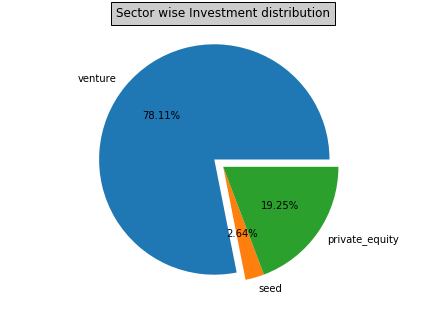

In [169]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = (0.1, 0, 0)  
ax.pie(list(plot1_final["percent"]), labels = list(plot1_final["funding_type"]),autopct='%1.2f%%', explode = explode)
plt.title("Sector wise Investment distribution", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

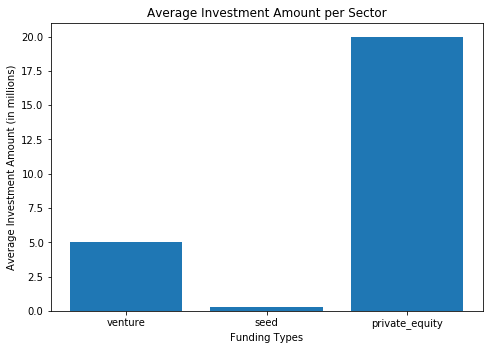

In [170]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y_axis_data = [x/1000000 for x in list(plot1_final["average_amount"])]
ax.bar( list(plot1_final["funding_type"]) , y_axis_data )
ax.set_xlabel('Funding Types')
ax.set_ylabel('Average Investment Amount (in millions)')
ax.set_title('Average Investment Amount per Sector')
plt.show()

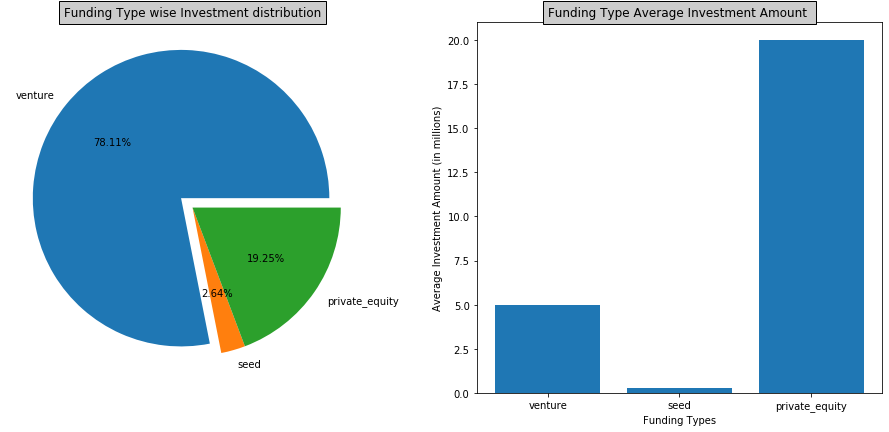

In [171]:
# Create a figure having 4 subplots

fig, axs = plt.subplots(2, 2, figsize=(16,15))

# subplot 1
explode = (0.1, 0, 0)  
axs[0, 0].pie(list(plot1_final["percent"]), labels = list(plot1_final["funding_type"]),autopct='%1.2f%%', explode = explode)
axs[0, 0].set_title("Funding Type wise Investment distribution", bbox={'facecolor':'0.8', 'pad':5})

# subplot 2  
y_axis_data = [x/1000000 for x in list(plot1_final["average_amount"])]
axs[0, 1].bar( list(plot1_final["funding_type"]) , y_axis_data )
axs[0, 1].set_xlabel('Funding Types')
axs[0, 1].set_ylabel('Average Investment Amount (in millions)')
axs[0, 1].set_title("Funding Type Average Investment Amount ", bbox={'facecolor':'0.8', 'pad':5})

fig.delaxes(axs[1,0])
fig.delaxes(axs[1,1])
fig.savefig("Investment_Analysis_Plot1_Harshit_Mehta.png")

In [172]:
# Filtering out non-english speaking countries from top 9 countries
plot2_df = pd.merge(master_frame_by_country_code_df[0:30], english_speaking, how="inner", on="country_code")
plot2_df

,country_code,raised_amount_usd
0,USA,3.439952e+11
1,GBR,1.723388e+10
2,IND,1.009985e+10
3,CAN,8.791852e+09
4,ISR,6.892978e+09
5,SGP,2.159116e+09
6,IRL,1.784919e+09
7,AUS,1.327673e+09
8,HKG,8.564410e+08


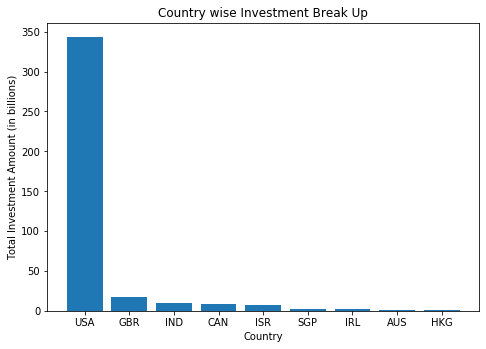

In [173]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y_axis_data = [x/1000000000 for x in list(plot2_df["raised_amount_usd"])]
ax.bar( list(plot2_df["country_code"]) , y_axis_data )
ax.set_xlabel('Country')
ax.set_ylabel('Total Investment Amount (in billions)')
ax.set_title('Country wise Investment Break Up')
plt.show()
fig.savefig("Investment_Analysis_Plot2_Harshit_Mehta.png")

In [174]:
D1

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Entertainment
14,/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,media,Entertainment
21,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,media,Entertainment
22,/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,media,Entertainment
33,/organization/mediabong,MEDIABONG,Media|Semantic Search|Video,operating,USA,/funding-round/9282890ca87072025dc1807f400acee6,venture,13-05-2015,5000000.0,media,Entertainment
37,/organization/newscorporation,News Corp,Media|News|Publishing,ipo,USA,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,08-01-2010,12500000.0,media,Entertainment
38,/organization/nokeena,Ankeena Networks,Media|Software,acquired,USA,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,08-08-2008,9400000.0,media,Entertainment
40,/organization/nokeena,Ankeena Networks,Media|Software,acquired,USA,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,25-06-2009,6500000.0,media,Entertainment
43,/organization/otter-media,Otter Media,Media|Venture Capital|Video,operating,USA,/funding-round/8f0d1129cb5436a5e92d06a2f564a012,venture,22-04-2014,5000000.0,media,Entertainment
44,/organization/priyo,Priyo,Media|Publishing,operating,USA,/funding-round/c5c91110f55842f75e7241901570b0c7,venture,02-07-2015,5000000.0,media,Entertainment


In [175]:
# Preparing data from graph 1 of plot 3 - USA (D1)
plot3_D1 = D1.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc = ['count']).sort_values(('count','raised_amount_usd'), ascending=False)
plot3_D1

,count
,raised_amount_usd
main_sector,
Others,3383
"Social, Finance, Analytics, Advertising",3321
Cleantech / Semiconductors,2954
"News, Search and Messaging",1871
Health,1049
Manufacturing,995
Entertainment,759
Automotive & Sports,241


In [176]:
# Selecting top 3 Sectors
plot3_D1.columns = ['count']
plot3_D1 = plot3_D1.loc[[True,True,True],:]
plot3_D1

,count
main_sector,
Others,3383
"Social, Finance, Analytics, Advertising",3321
Cleantech / Semiconductors,2954


In [177]:
# Extracting the index for plotting
plot3_D1 = plot3_D1.reset_index()
plot3_D1

,main_sector,count
0,Others,3383
1,"Social, Finance, Analytics, Advertising",3321
2,Cleantech / Semiconductors,2954


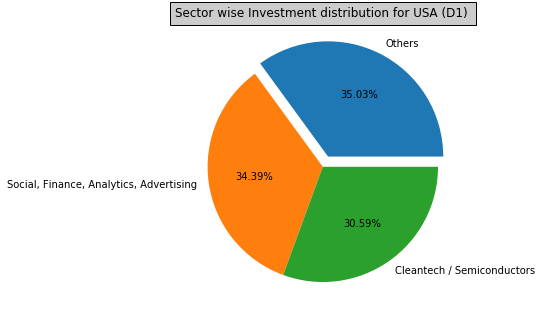

In [178]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = (0.1, 0, 0)  
ax.pie(list(plot3_D1["count"]), labels = list(plot3_D1["main_sector"]),autopct='%1.2f%%', explode = explode)
plt.title("Sector wise Investment distribution for USA (D1) ", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [179]:
# Preparing data from graph 2 of plot 3 - GBR (D2)
plot3_D2 = D2.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc = ['count']).sort_values(('count','raised_amount_usd'), ascending=False)
plot3_D2

,count
,raised_amount_usd
main_sector,
Others,201
"Social, Finance, Analytics, Advertising",187
Cleantech / Semiconductors,161
"News, Search and Messaging",88
Entertainment,75
Manufacturing,50
Health,31
Automotive & Sports,23


In [180]:
# Selecting top 3 Sectors
plot3_D2.columns = ['count']
plot3_D2 = plot3_D2.loc[[True,True,True],:]
plot3_D2

,count
main_sector,
Others,201
"Social, Finance, Analytics, Advertising",187
Cleantech / Semiconductors,161


In [181]:
# Extracting the index for plotting
plot3_D2 = plot3_D2.reset_index()
plot3_D2

,main_sector,count
0,Others,201
1,"Social, Finance, Analytics, Advertising",187
2,Cleantech / Semiconductors,161


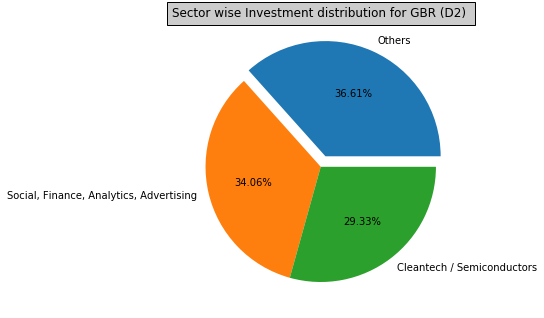

In [182]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = (0.1, 0, 0)  
ax.pie(list(plot3_D2["count"]), labels = list(plot3_D2["main_sector"]),autopct='%1.2f%%', explode = explode)
plt.title("Sector wise Investment distribution for GBR (D2) ", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [183]:
# Preparing data from graph 3 of plot 3 - IND (D3)
plot3_D3 = D3.pivot_table(values = 'raised_amount_usd', index = 'main_sector', aggfunc = ['count']).sort_values(('count','raised_amount_usd'), ascending=False)
plot3_D3

,count
,raised_amount_usd
main_sector,
Cleantech / Semiconductors,123
Others,109
"Social, Finance, Analytics, Advertising",88
"News, Search and Messaging",57
Manufacturing,43
Entertainment,30
Health,22
Automotive & Sports,5


In [184]:
# Selecting top 3 Sectors
plot3_D3.columns = ['count']
plot3_D3 = plot3_D3.loc[[True,True,True],:]
plot3_D3

,count
main_sector,
Cleantech / Semiconductors,123
Others,109
"Social, Finance, Analytics, Advertising",88


In [185]:
# Extracting the index for plotting
plot3_D3 = plot3_D3.reset_index()
plot3_D3

,main_sector,count
0,Cleantech / Semiconductors,123
1,Others,109
2,"Social, Finance, Analytics, Advertising",88


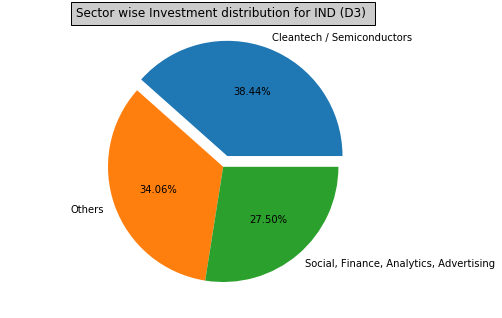

In [186]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = (0.1, 0, 0)  
ax.pie(list(plot3_D3["count"]), labels = list(plot3_D3["main_sector"]),autopct='%1.2f%%', explode = explode)
plt.title("Sector wise Investment distribution for IND (D3) ", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

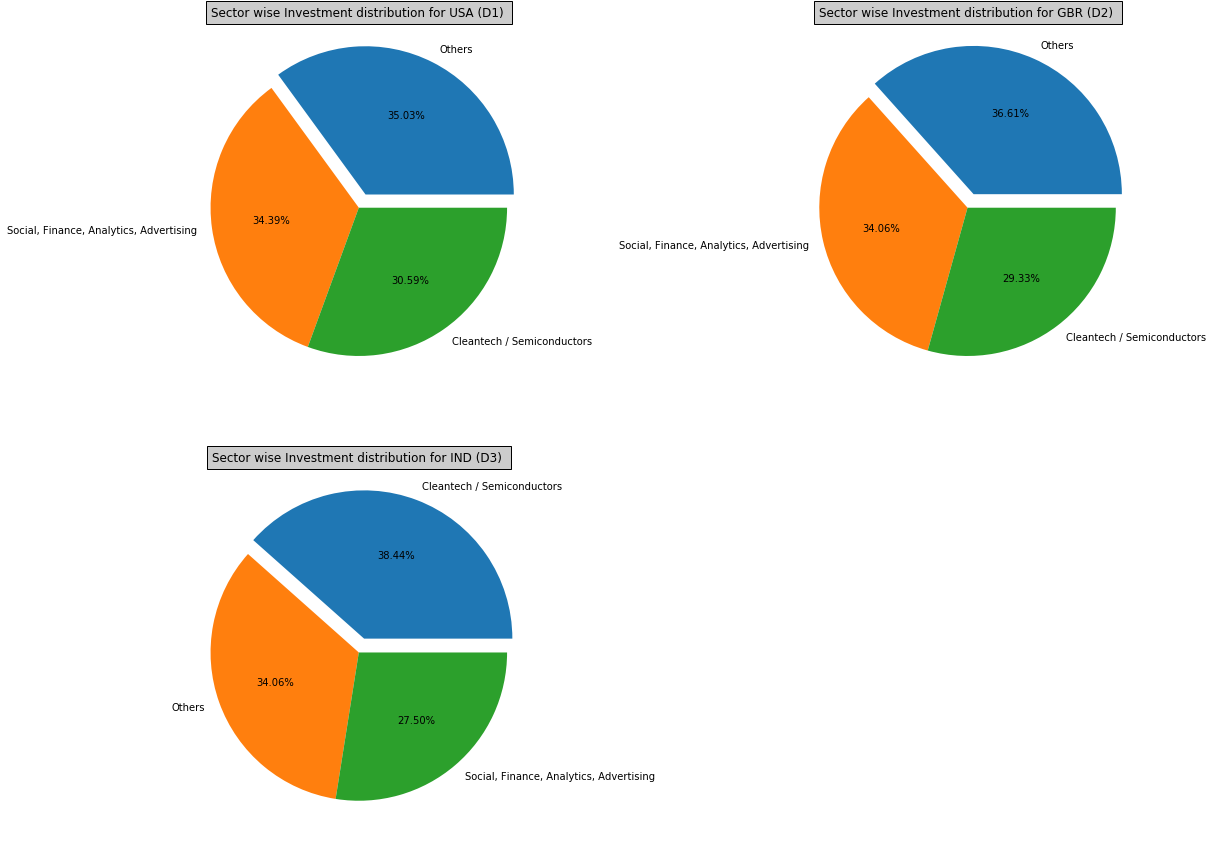

In [187]:
# Create a figure having 3 subplots

fig, axs = plt.subplots(2, 2, figsize=(20,15))

# subplot 1
explode = (0.1, 0, 0)  
axs[0, 0].pie(list(plot3_D1["count"]), labels = list(plot3_D1["main_sector"]),autopct='%1.2f%%', explode = explode)
axs[0, 0].set_title("Sector wise Investment distribution for USA (D1) ", bbox={'facecolor':'0.8', 'pad':5})

# subplot 2 
explode = (0.1, 0, 0)  
axs[0, 1].pie(list(plot3_D2["count"]), labels = list(plot3_D2["main_sector"]),autopct='%1.2f%%', explode = explode)
axs[0, 1].set_title("Sector wise Investment distribution for GBR (D2) ", bbox={'facecolor':'0.8', 'pad':5})

# subplot 3
explode = (0.1, 0, 0)  
axs[1, 0].pie(list(plot3_D3["count"]), labels = list(plot3_D3["main_sector"]),autopct='%1.2f%%', explode = explode)
axs[1, 0].set_title("Sector wise Investment distribution for IND (D3) ", bbox={'facecolor':'0.8', 'pad':5})

fig.delaxes(axs[1,1])
fig.savefig("Investment_Analysis_Plot3_Harshit_Mehta.png")